<a href="https://colab.research.google.com/github/sachinthadilshann/TensorFlow_for_Deep_Learning_Bootcamp_Udemy/blob/main/04_transfer_learning_in_tensorflow_part_1_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import datetime

In [67]:
import zipfile


!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()


--2025-02-19 12:40:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.207, 172.217.194.207, 172.253.118.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.3’

10_food_classes_10_ 100%[===================>] 160.74M  19.3MB/s    in 8.8s    

2025-02-19 12:40:29 (18.3 MB/s) - ‘10_food_classes_10_percent.zip.3’ saved [168546183/168546183]



In [68]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

test_dir = '10_food_classes_10_percent/test'
train_dir = '10_food_classes_10_percent/train'

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images: ")

train_data_10_precent= train_datagen.flow_from_directory(train_dir,
                                                          target_size=IMAGE_SHAPE,
                                                          batch_size=BATCH_SIZE,
                                                          class_mode='categorical')

print("Testing images: ")

test_data_10_precent = test_datagen.flow_from_directory(test_dir,
                                                          target_size=IMAGE_SHAPE,
                                                          batch_size=BATCH_SIZE,
                                                          class_mode='categorical')

Training images: 
Found 750 images belonging to 10 classes.
Testing images: 
Found 2500 images belonging to 10 classes.


In [70]:
#crete tensorbord callback
def create_tensorboard_callback(dir_name, experiment_name):
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

# Creating Models using Tensorfolw Hub



In [71]:
'''
import tensorflow_hub as hub
m = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-classification/1")
])
m.build([None, expect_img_size, expect_img_size, 3])  # Batch input shape.

'''

'\nimport tensorflow_hub as hub\nm = tf.keras.Sequential([\n    hub.KerasLayer("https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-classification/1")\n])\nm.build([None, expect_img_size, expect_img_size, 3])  # Batch input shape.\n\n'

In [72]:
resnet_url =  "https://www.kaggle.com/models/google/resnet-v2/TensorFlow2/50-feature-vector/2"
efficientnet_url = "https://www.kaggle.com/models/google/efficientnet-v2/TensorFlow2/imagenet1k-b0-feature-vector/2"

In [73]:
resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4'

In [74]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import tf_keras as keras

In [75]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [76]:
def create_model(model_url, num_classes=10):
    feature_extractor_layer = hub.KerasLayer(model_url,
                                             trainable=False,
                                             name='feature_extraction_layer',
                                             input_shape=IMAGE_SHAPE + (3,))

    model = keras.Sequential([
        feature_extractor_layer,
        keras.layers.Dense(num_classes, activation='softmax', name='output_layer')
    ])
    return model

In [77]:
#create Resent model

resnet_model = create_model(resnet_url,
                            num_classes=train_data_10_precent.num_classes)
resnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23585290 (89.97 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [78]:
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])


In [79]:
resnet_history = resnet_model.fit(train_data_10_precent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_precent),
                                  validation_data=test_data_10_precent,
                                  validation_steps=len(test_data_10_precent),
                                  )


Epoch 1/5
24/24 [==============================] - 17s 573ms/step - loss: 1.9843 - accuracy: 0.3240 - val_loss: 1.2133 - val_accuracy: 0.6136
Epoch 2/5
24/24 [==============================] - 10s 423ms/step - loss: 0.9152 - accuracy: 0.7373 - val_loss: 0.8515 - val_accuracy: 0.7268
Epoch 3/5
24/24 [==============================] - 10s 436ms/step - loss: 0.6285 - accuracy: 0.8227 - val_loss: 0.7380 - val_accuracy: 0.7696
Epoch 4/5
24/24 [==============================] - 12s 532ms/step - loss: 0.4823 - accuracy: 0.8840 - val_loss: 0.7000 - val_accuracy: 0.7776
Epoch 5/5
24/24 [==============================] - 10s 436ms/step - loss: 0.3888 - accuracy: 0.9160 - val_loss: 0.6747 - val_accuracy: 0.7904


In [80]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_loss']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy,label='training_accuracy')
  plt.plot(epochs,val_accuracy,label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

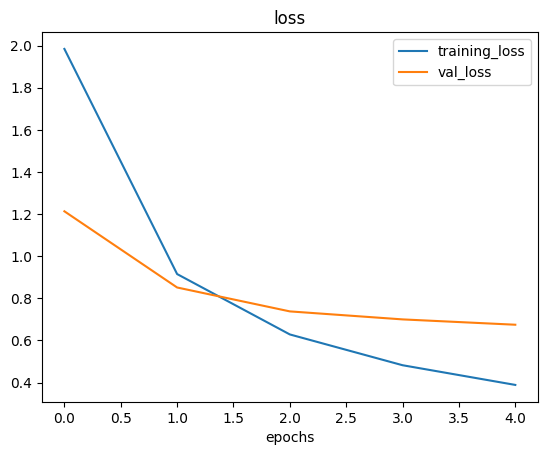

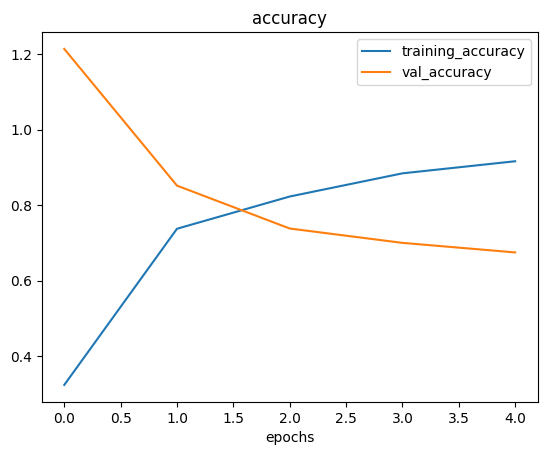

In [81]:
plot_loss_curves(resnet_history)

In [82]:
efficientnet_model = create_model(efficientnet_url,
                                  num_classes=train_data_10_precent.num_classes)


In [83]:
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer='adam',
                           metrics=['accuracy'])
efficientnet_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1280)              5919312   
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


In [84]:
efficientnet_history = efficientnet_model.fit(train_data_10_precent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_precent),
                                  validation_data=test_data_10_precent,
                                  validation_steps=len(test_data_10_precent)
                                  )

Epoch 1/5
24/24 [==============================] - 22s 608ms/step - loss: 1.9247 - accuracy: 0.3893 - val_loss: 1.4858 - val_accuracy: 0.6064
Epoch 2/5
24/24 [==============================] - 13s 543ms/step - loss: 1.2761 - accuracy: 0.6827 - val_loss: 1.1130 - val_accuracy: 0.7092
Epoch 3/5
24/24 [==============================] - 12s 534ms/step - loss: 1.0051 - accuracy: 0.7467 - val_loss: 0.9406 - val_accuracy: 0.7396
Epoch 4/5
24/24 [==============================] - 8s 358ms/step - loss: 0.8452 - accuracy: 0.7973 - val_loss: 0.8436 - val_accuracy: 0.7484
Epoch 5/5
24/24 [==============================] - 9s 403ms/step - loss: 0.7426 - accuracy: 0.8253 - val_loss: 0.8077 - val_accuracy: 0.7576


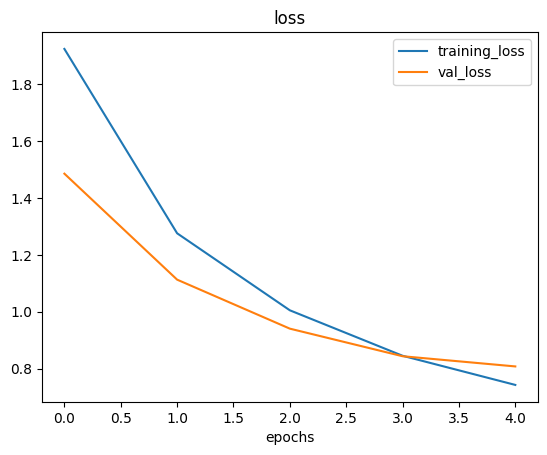

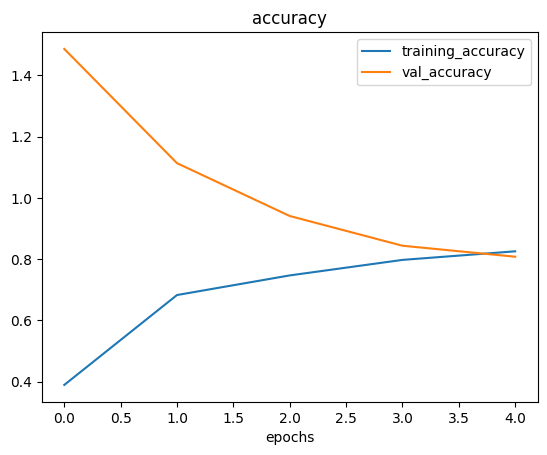

In [85]:
plot_loss_curves(efficientnet_history)